In [1]:
!pip install opendatasets

In [2]:
import opendatasets as od
od.download("https://www.kaggle.com/datasets/moazeldsokyx/dogs-vs-cats")

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: rajpshedge
Your Kaggle Key: ··········
Dataset URL: https://www.kaggle.com/datasets/moazeldsokyx/dogs-vs-cats


100%|██████████| 817M/817M [00:04<00:00, 191MB/s]

In [3]:
import os
import numpy as np
from skimage.io import imread
from skimage.transform import resize
from sklearn.svm import SVC
from sklearn.metrics import classification_report

IMAGE_SIZE = (128, 128)
TRAIN_DIR = '/content/dogs-vs-cats/dataset/train'
TEST_DIR = '/content/dogs-vs-cats/dataset/test'
MAX_IMAGES_PER_CLASS = 500  # Limit the number of images per class

def load_images_with_subfolders(base_folder, max_images_per_class):
    X, y = [], []
    if not os.path.exists(base_folder):
        print(f"[ERROR] Folder not found: {base_folder}")
        return np.array(X), np.array(y)

    print(f"Loading images from: {base_folder}")
    for label_name in ['cats', 'dogs']:
        label_folder = os.path.join(base_folder, label_name)
        if not os.path.exists(label_folder):
            print(f"[WARNING] Label folder not found: {label_folder}")
            continue

        images_loaded = 0
        for filename in os.listdir(label_folder):
            if images_loaded >= max_images_per_class:
                break  # Stop loading if max images reached

            if filename.lower().endswith(('.jpg', '.jpeg', '.png')):
                try:
                    img_path = os.path.join(label_folder, filename)
                    img = imread(img_path)
                    img_resized = resize(img, IMAGE_SIZE, anti_aliasing=True)
                    X.append(img_resized.flatten())
                    y.append(0 if label_name == 'cats' else 1)
                    images_loaded += 1
                except Exception as e:
                    print(f"Skipping file {filename}: {e}")
                    continue
    return np.array(X), np.array(y)

# Load data
X_train, y_train = load_images_with_subfolders(TRAIN_DIR, MAX_IMAGES_PER_CLASS)
X_test, y_test = load_images_with_subfolders(TEST_DIR, MAX_IMAGES_PER_CLASS)

if len(X_train) == 0 or len(X_test) == 0:
    print("No training or test data loaded. Cannot proceed with training.")
else:
    print(f"Training samples: {len(X_train)}")
    print(f"Test samples: {len(X_test)}")

    # Train SVM
    svm_model = SVC(kernel='linear')
    svm_model.fit(X_train, y_train)

    # Predict and evaluate
    y_pred = svm_model.predict(X_test)
    print(classification_report(y_test, y_pred, target_names=['Cat', 'Dog']))

Loading images from: /content/dogs-vs-cats/dataset/train
Loading images from: /content/dogs-vs-cats/dataset/test
Training samples: 1000
Test samples: 1000
              precision    recall  f1-score   support

         Cat       0.57      0.63      0.60       500
         Dog       0.59      0.52      0.55       500

    accuracy                           0.58      1000
   macro avg       0.58      0.58      0.58      1000
weighted avg       0.58      0.58      0.58      1000



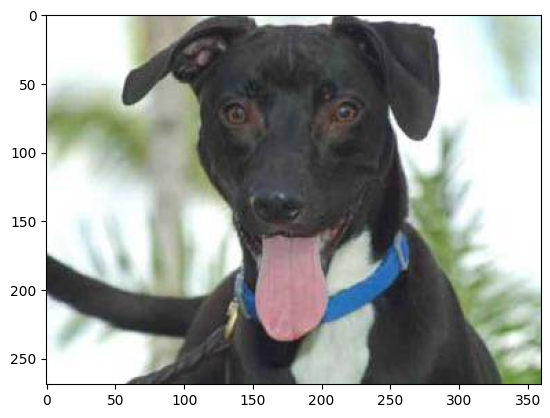

The predicted image is : Dog


In [8]:
import matplotlib.pyplot as plt
import numpy as np
from skimage.io import imread
from skimage.transform import resize
from sklearn.svm import SVC
from sklearn.metrics import classification_report

path='/content/dogs-vs-cats/dataset/test/dogs/dog (10).jpg'
img=imread(path)
plt.imshow(img)
plt.show()
img_resize=resize(img,(IMAGE_SIZE)) # Use the defined IMAGE_SIZE
l=[img_resize.flatten()]

# Make prediction using the trained model
# Check if svm_model is defined in the current environment
if 'svm_model' in globals():
    Categories = ['Cat', 'Dog']
    prediction = svm_model.predict(l)[0]
    print("The predicted image is : " + Categories[prediction])
else:
    print("SVM model is not trained yet. Please run the training cell first.")

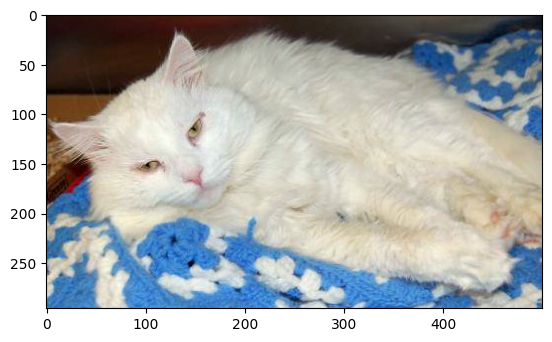

The predicted image is : Cat


In [22]:
path='/content/dogs-vs-cats/dataset/test/cats/cat (1127).jpg'
img=imread(path)
plt.imshow(img)
plt.show()
img_resize=resize(img,(IMAGE_SIZE)) # Use the defined IMAGE_SIZE
l=[img_resize.flatten()]

# Make prediction using the trained model
# Check if svm_model is defined in the current environment
if 'svm_model' in globals():
    Categories = ['Cat', 'Dog']
    prediction = svm_model.predict(l)[0]
    print("The predicted image is : " + Categories[prediction])
else:
    print("SVM model is not trained yet. Please run the training cell first.")